In [5]:
def find_not_blood_sample(samplenames):
  li = []
  for i, name in enumerate(samplenames):
    if "Blood" not in name:
        li.append (i)
  return li


import pandas as pd
import vcf

# PROJECT_DIR = "/data/project/Meningioma/61.Lowinput/01.XT_HS"
# vcf_reader = vcf.Reader(open( PROJECT_DIR + "/06.HC/07.2D_merged/01.BCFTOOLS_MERGE_TXT/190426.merge.vcf", "r"))
# title = "190426"
# Output_filename = PROJECT_DIR + "/06.HC/07.2D_merged/01.BCFTOOLS_MERGE_TXT/190426.merged.heatmap.pdf"

PROJECT_DIR = "/data/project/Meningioma/61.Lowinput/02.PTA"
vcf_reader = vcf.Reader(open( PROJECT_DIR + "/06.HC/07.2D_merged/01.BCFTOOLS_MERGE_TXT/230405.merge.vcf", "r"))
title = "230405"
Output_filename = PROJECT_DIR + "/06.HC/07.2D_merged/01.BCFTOOLS_MERGE_TXT/230405.merged.heatmap.pdf"


samplenames = vcf_reader.samples
not_blood_sample_i = find_not_blood_sample ( samplenames )

df = pd.DataFrame ( columns = [ samplenames[i] for i in not_blood_sample_i ] )            # Blood가 아닌 샘플들에 대해서만 집어넣겠다
chrpos = []

for line in vcf_reader:
    CHR = line.CHROM
    POS = str (line.POS)
    REF, ALT = str(line.REF), str( line.ALT[0] )

    matrix = []
    for sample_i, samplename in enumerate (samplenames):
        if line.samples [sample_i].data.GT in ["./.", "0/0", "0|0"]:
            matrix.append ( 0 )
        else:
            matrix.append ( 1  )

    df.loc [ len(df.index) ] =  [ matrix[i] for i in not_blood_sample_i ]      # 한줄씩 집어넣기
    chrpos.append ( CHR + "_" + POS )
df.index =  chrpos

df = df.sort_values(by=df.columns.tolist(), ascending=False)
df = df.T
df

,chr2_237372266,chr3_37323742,chr5_5239254,chr7_150720500,chr9_82982692,chr9_107487067,chr15_56096116,chr16_2176145,chr1_203483893,chr1_241635511,...,chr1_6785462,chr2_176108847,chr16_1414641,chr11_122946940,chr10_99620293,chr11_117428550,chr7_149784202,chr2_235670862,chr5_180949489,chr17_75502139
230405_2_Dura,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
230405_1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
230405_2,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
230405_3,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
230405_4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
230405_5,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,0,0,0,0,0,0
230405_6,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
230405_7,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
230405_8,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,1,1


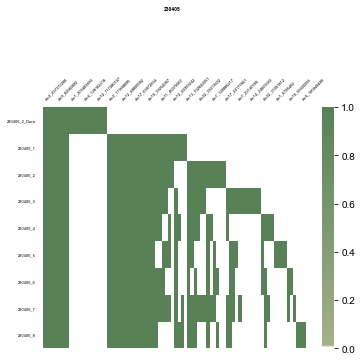

In [9]:
#def HEATMAP_VISUALIZATION (df, title, Output_filename, **kwargs):
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap



plt.rcParams["font.family"] = 'arial'

# Define the colors
colors = [ "white", "#A3B18A", "#588157"]
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize =( 6 , 5 ))

positions = [0, 0.01, 1]  # Define the positions for each color
# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

fig.subplots_adjust ( wspace = 0.4, bottom = 0.03, top = 0.7, left = 0.22, right = 0.98)
fig.set_facecolor('white')

#sns.heatmap (df , cmap = cmap, linewidths = 0.5, linecolor = "black", annot = df, annot_kws={"size": 25 / np.sqrt(len(df))} )   # fmt=".2f", 
sns.heatmap (df , cmap = cmap, linewidths = 0, linecolor = "black")   # fmt=".2f", 
    
    
fig.suptitle ( title, fontsize = 5, fontweight = "bold", ha = "left", x = 0.5 )
ax.set_xticklabels( ax.get_xticklabels(), fontsize = 4, ha = 'left' )
ax.tick_params(axis = 'x',  rotation = 45)
ax.set_yticklabels( [ i.get_text().replace( "_Multiplex.sorted" , "" ) for i in ax.get_yticklabels()], fontsize = 12, va = 'center' )
ax.tick_params(axis = 'y')

plt.tick_params(axis='both', which='major', labelsize = 4, left = False, labelbottom = False, bottom=False, top = False, labeltop=True)

fig.savefig ( Output_filename, dpi = 300)